# Load Data

In [882]:
import pandas as pd
from datetime import datetime
from datetime import date

HOME_PATH = '/Users/shaynaanderson-hill/medic_mobile/20190402-Data Scientist Interview Exercises Datasets/'

#Load Datasets
assessment_follow_up_df = pd.read_csv(
    HOME_PATH + 'assessment_follow_up.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

assessments_df = pd.read_csv(
    HOME_PATH + 'assessments.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

delivery_df = pd.read_csv(
    HOME_PATH + 'delivery.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

family_survey_df = pd.read_csv(
    HOME_PATH + 'family_survey.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

person_df = pd.read_csv(
    HOME_PATH + 'person.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

pregnancy_df = pd.read_csv(
    HOME_PATH + 'pregnancy.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)

pregnancy_visit_df = pd.read_csv(
    HOME_PATH + 'pregnancy_visit.csv',
    header=0, 
    dtype={'width': int, 'column_name': str, 'variable_type': str}
)


# Rename Columns 

In [883]:
#Add table prefixes to avoid confusion
#person_df = person_df.add_prefix('person_')
#family_survey_df = family_survey_df.add_prefix('family_survey_')
assessments_df = assessments_df.add_prefix('assessment_')
assessment_follow_up_df = assessment_follow_up_df.add_prefix('assessment_follow_up_')
pregnancy_df = pregnancy_df.add_prefix('pregnancy_')
pregnancy_visit_df = pregnancy_visit_df.add_prefix('pregnancy_visit_')
delivery_df = delivery_df.add_prefix('delivery_')


In [884]:
%%capture
#Remove redundant prefixes

assessments_df.rename(index=str, columns={'assessment_assessment_id': 'assessment_id', 'assessment_assessment_date_time_submitted': 'assessment_date_time_submitted'}, inplace=True) 
assessment_follow_up_df.rename(index=str, columns={'assessment_follow_up_assessment_follow_up_id': 'assessment_follow_up_id', 'assessment_follow_up_assessment_follow_up_date_time_submitted': 'assessment_follow_up_date_time_submitted'}, inplace=True) 
pregnancy_df.rename(index=str, columns={'pregnancy_pregnancy_form_id': 'pregnancy_form_id'}, inplace=True)
pregnancy_visit_df.rename(index=str, columns={'pregnancy_visit_pregnancy_visit_form_id': 'pregnancy_visit_form_id'}, inplace=True) 
delivery_df.rename(index=str, columns={'delivery_delivery_id': 'delivery_id', 'delivery_delivery_date_time_submitted': 'delivery_date_time_submitted', 'delivery_facility_delivery': 'facility_delivery', 'delivery_danger_signs_at_delivery': 'danger_signs_at_delivery'}, inplace=True) 



# Converting Data Types

In [885]:
#Date of birth

#Fix broken dates
#Assumption: date_of_birth = '1007-10-08' is supposed to be '2007-10-08'
person_df.loc[person_df.date_of_birth == '1007-10-08', 'date_of_birth'] = '2007-10-08'

#Assumption: date_of_birth = '1563-11-04' is supposed to be '1963-11-04'
person_df.loc[person_df.date_of_birth == '1563-11-04', 'date_of_birth'] = '1963-11-04'

#Assumption: date_of_birth = '1263-12-05 is supposed to be '1963-12-05'
person_df.loc[person_df.date_of_birth == '1263-12-05', 'date_of_birth'] = '1963-12-05'

#convert date strings to date objects
person_df['date_of_birth'] = pd.to_datetime(person_df['date_of_birth'])


In [886]:
#Last menstrual period
pregnancy_df['pregnancy_last_menstrual_period_date'] = pd.to_datetime(pregnancy_df['pregnancy_last_menstrual_period_date'])



In [887]:
#Expected due date
pregnancy_df['pregnancy_expected_due_date'] = pd.to_datetime(pregnancy_df['pregnancy_expected_due_date'])          


In [888]:
#Pregnancy registration submission
#first remove timezone
def remove_tz(date_str):
    return str(date_str[:(date_str.find("T"))])

pregnancy_df['pregnancy_date_time_submitted'] = pregnancy_df['pregnancy_date_time_submitted'].apply(remove_tz)

pregnancy_df['pregnancy_date_time_submitted'] = pd.to_datetime(pregnancy_df['pregnancy_date_time_submitted'])


In [916]:
#Pregnancy visit submission
pregnancy_visit_df['pregnancy_visit_date_time_submitted'] = pregnancy_visit_df['pregnancy_visit_date_time_submitted'].apply(remove_tz)

pregnancy_visit_df['pregnancy_visit_date_time_submitted'] = pd.to_datetime(pregnancy_visit_df['pregnancy_visit_date_time_submitted'])


In [890]:
#delivery submission
delivery_df['delivery_date_time_submitted'] = pd.to_datetime(delivery_df['delivery_date_time_submitted'])        

 

# Parse Data

In [891]:
#placeholder new data frame with split value columns 
new = pregnancy_df["pregnancy_risk_factors"].str.split(" ", n=6, expand = True) 

new["r1"] = ""
new["r2"] = ""
new["r3"] = ""
new["r4"] = ""
new["r5"] = ""
new["r6"] = ""

for index, row in new.iterrows():
    if row[0] == 'r1' or row[1] == 'r1' or row[2] == 'r1' or row[3] == 'r1' or row[4] == 'r1' or row[5]=='r1':
        row['r1'] = True
    else: row['r1'] = False
    if row[0] == 'r2' or row[1] == 'r2' or row[2] == 'r2' or row[3] == 'r2' or row[4] == 'r2' or row[5]=='r2':
        row['r2'] = True
    else: row['r2'] = False
    if row[0] == 'r3' or row[1] == 'r3' or row[2] == 'r3' or row[3] == 'r3' or row[4] == 'r3' or row[5]=='r3':
        row['r3'] = True
    else: row['r3'] = False
    if row[0] == 'r4' or row[1] == 'r4' or row[2] == 'r4' or row[3] == 'r4' or row[4] == 'r4' or row[5]=='r4':
        row['r4'] = True
    else: row['r4'] = False
    if row[0] == 'r5' or row[1] == 'r5' or row[2] == 'r5' or row[3] == 'r5' or row[4] == 'r5' or row[5]=='r5':
        row['r5'] = True
    else: row['r5'] = False
    if row[0] == 'r6' or row[1] == 'r6' or row[2] == 'r6' or row[3] == 'r6' or row[4] == 'r6' or row[5]=='r6':
        row['r6'] = True
    else: row['r6'] = False

# making seperate risk factor columns from new data frame 
pregnancy_df["risk_factor_1"]= new['r1'] 
pregnancy_df["risk_factor_2"]= new['r2'] 
pregnancy_df["risk_factor_3"]= new['r3'] 
pregnancy_df["risk_factor_4"]= new['r4'] 
pregnancy_df["risk_factor_5"]= new['r5']  
pregnancy_df["risk_factor_6"]= new['r6'] 
  
# Dropping old Name columns 
pregnancy_df.drop(columns =["pregnancy_risk_factors"], inplace = True) 
  
# df display 
#pregnancy_df

In [892]:
#placeholder new data frame with split value columns 
new = pregnancy_df["pregnancy_danger_signs"].str.split(" ", n=9, expand = True) 

new["d1"] = ""
new["d2"] = ""
new["d3"] = ""
new["d4"] = ""
new["d5"] = ""
new["d6"] = ""
new["d7"] = ""
new["d8"] = ""
new["d9"] = ""

for index, row in new.iterrows():
    if row[0] == 'd1' or row[1] == 'd1' or row[2] == 'd1' or row[3] == 'd1' or row[4] == 'd1' or row[5]=='d1':
        row['d1'] = True
    else: row['d1'] = False
    if row[0] == 'd2' or row[1] == 'd2' or row[2] == 'd2' or row[3] == 'd2' or row[4] == 'd2' or row[5]=='d2':
        row['d2'] = True
    else: row['d2'] = False
    if row[0] == 'd3' or row[1] == 'd3' or row[2] == 'd3' or row[3] == 'd3' or row[4] == 'd3' or row[5]=='d3':
        row['d3'] = True
    else: row['d3'] = False
    if row[0] == 'd4' or row[1] == 'd4' or row[2] == 'd4' or row[3] == 'd4' or row[4] == 'd4' or row[5]=='d4':
        row['d4'] = True
    else: row['d4'] = False
    if row[0] == 'd5' or row[1] == 'd5' or row[2] == 'd5' or row[3] == 'd5' or row[4] == 'd5' or row[5]=='d5':
        row['d5'] = True
    else: row['d5'] = False
    if row[0] == 'd6' or row[1] == 'd6' or row[2] == 'd6' or row[3] == 'd6' or row[4] == 'd6' or row[5]=='d6':
        row['d6'] = True
    else: row['d6'] = False
    if row[0] == 'd7' or row[1] == 'd7' or row[2] == 'd7' or row[3] == 'd7' or row[4] == 'd7' or row[5]=='d7':
        row['d7'] = True
    else: row['d7'] = False
    if row[0] == 'd8' or row[1] == 'd8' or row[2] == 'd8' or row[3] == 'd8' or row[4] == 'd8' or row[5]=='d8':
        row['d8'] = True
    else: row['d8'] = False
    if row[0] == 'd9' or row[1] == 'd9' or row[2] == 'd9' or row[3] == 'd9' or row[4] == 'd9' or row[5]=='d9':
        row['d9'] = True
    else: row['d9'] = False

# making seperate danger signs from new data frame 
pregnancy_df["danger_signs_1"]= new['d1'] 
pregnancy_df["danger_signs_2"]= new['d2'] 
pregnancy_df["danger_signs_3"]= new['d3'] 
pregnancy_df["danger_signs_4"]= new['d4'] 
pregnancy_df["danger_signs_5"]= new['d5']  
pregnancy_df["danger_signs_6"]= new['d6']  
pregnancy_df["danger_signs_7"]= new['d7']  
pregnancy_df["danger_signs_8"]= new['d8'] 
pregnancy_df["danger_signs_9"]= new['d9'] 

# Dropping old Name columns 
pregnancy_df.drop(columns =["pregnancy_danger_signs"], inplace = True) 
  
# df display 
#pregnancy_df

In [920]:
#placeholder new data frame with split value columns 
new = pregnancy_visit_df["pregnancy_visit_danger_signs"].str.split(" ", n=9, expand = True) 

new["d1"] = ""
new["d2"] = ""
new["d3"] = ""
new["d4"] = ""
new["d5"] = ""
new["d6"] = ""
new["d7"] = ""
new["d8"] = ""
new["d9"] = ""

for index, row in new.iterrows():
    if row[0] == 'd1' or row[1] == 'd1' or row[2] == 'd1' or row[3] == 'd1' or row[4] == 'd1' or row[5]=='d1':
        row['d1'] = True
    else: row['d1'] = False
    if row[0] == 'd2' or row[1] == 'd2' or row[2] == 'd2' or row[3] == 'd2' or row[4] == 'd2' or row[5]=='d2':
        row['d2'] = True
    else: row['d2'] = False
    if row[0] == 'd3' or row[1] == 'd3' or row[2] == 'd3' or row[3] == 'd3' or row[4] == 'd3' or row[5]=='d3':
        row['d3'] = True
    else: row['d3'] = False
    if row[0] == 'd4' or row[1] == 'd4' or row[2] == 'd4' or row[3] == 'd4' or row[4] == 'd4' or row[5]=='d4':
        row['d4'] = True
    else: row['d4'] = False
    if row[0] == 'd5' or row[1] == 'd5' or row[2] == 'd5' or row[3] == 'd5' or row[4] == 'd5' or row[5]=='d5':
        row['d5'] = True
    else: row['d5'] = False
    if row[0] == 'd6' or row[1] == 'd6' or row[2] == 'd6' or row[3] == 'd6' or row[4] == 'd6' or row[5]=='d6':
        row['d6'] = True
    else: row['d6'] = False
    if row[0] == 'd7' or row[1] == 'd7' or row[2] == 'd7' or row[3] == 'd7' or row[4] == 'd7' or row[5]=='d7':
        row['d7'] = True
    else: row['d7'] = False
    if row[0] == 'd8' or row[1] == 'd8' or row[2] == 'd8' or row[3] == 'd8' or row[4] == 'd8' or row[5]=='d8':
        row['d8'] = True
    else: row['d8'] = False
    if row[0] == 'd9' or row[1] == 'd9' or row[2] == 'd9' or row[3] == 'd9' or row[4] == 'd9' or row[5]=='d9':
        row['d9'] = True
    else: row['d9'] = False

# making seperate danger signs from new data frame 
pregnancy_visit_df["danger_signs_1"]= new['d1'] 
pregnancy_visit_df["danger_signs_2"]= new['d2'] 
pregnancy_visit_df["danger_signs_3"]= new['d3'] 
pregnancy_visit_df["danger_signs_4"]= new['d4'] 
pregnancy_visit_df["danger_signs_5"]= new['d5']  
pregnancy_visit_df["danger_signs_6"]= new['d6']  
pregnancy_visit_df["danger_signs_7"]= new['d7']  
pregnancy_visit_df["danger_signs_8"]= new['d8'] 
pregnancy_visit_df["danger_signs_9"]= new['d9'] 

# Dropping old Name columns 
pregnancy_visit_df.drop(columns =["pregnancy_visit_danger_signs"], inplace = True) 
  
# df display 
#pregnancy_visit_df

# Missing Data

In [893]:
#person_df
person_df.describe(include = 'all')
# 12 people have missing households
# 4,440 people are missing sex data
# 1,050 are missing their date of birth


,person_id,sex,date_of_birth,hh_id
count,909991,905551,908941,909979
unique,909991,5,31345,227445
top,a60b88a232ae2fe440659af9c12ef775,female,2014-08-28 00:00:00,d4906d1f2ebe160656766b5f1ecdca98
freq,1,495600,260,75
first,NaN,NaN,1684-12-08 00:00:00,NaN
last,NaN,NaN,2066-02-06 00:00:00,NaN


# Impute Missing Data

In [904]:
#Impute average patient_age_in_years for missing data

pregnancy_df['pregnancy_patient_age_in_years'].fillna((pregnancy_df['pregnancy_patient_age_in_years'].mean()), inplace=True)


# Delivery Response Variables

In [907]:
#Sample size rule of thumb (Peduzzi)
#Let p be the smallest of the proportions of negative or positive cases in the population and 
#k the number of covariates (the number of independent variables), then the minimum number of cases to include is:
#N = 10 k / p


In [908]:
#Delivery Outcomes
#danger_signs_at_delivery
print(delivery_df.groupby('danger_signs_at_delivery').size())
#24110

danger_signs_at_delivery
False    23531
True       579
dtype: int64


In [909]:
#facility_delivery
print(delivery_df.groupby('facility_delivery').size())

facility_delivery
False     4265
True     28200
dtype: int64


In [910]:
#first_visit_on_time
print(delivery_df.groupby('delivery_first_visit_on_time').size())

delivery_first_visit_on_time
False     1830
True     30635
dtype: int64


# Explore Data

In [981]:
#Count registered pregnancies

print('There are ' + str(pregnancy_df['pregnancy_form_id'].nunique()) + ' registered pregnancies in our dataset')


There are 49245 registered pregnancies in our dataset


In [982]:
# Count pregnant women

print('There are ' + str(pregnancy_df['pregnancy_patient_id'].nunique()) + ' women with registered pregnancies in our dataset')


There are 46840 women with registered pregnancies in our dataset


1 max deliveries per patient
10 max pregnancy registrations per pateient


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x3fdc04c88>]],
      dtype=object)

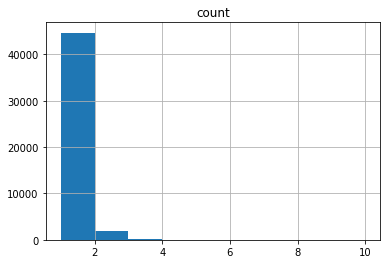

In [984]:
#Since there is no pregnancy_id, there is a bit of difficulty involved in joining the pregnancy registration data 
#to the delivery data. We can use the patient_id, but since one patient can have multiple pregnancies and multiple
#deliveries, we do not know for sure that a given pregnancy registration corresponds to a given delivery.

#There are ways to help mediate this, by trying to link a pregnancy registration with a delivery by using a timeframe
#around the approximated due date, but this is not foolproof


#To see how much this could affect our analysis, let's see for how many women, do we have multiple deliveries
print(str(delivery_df.groupby('delivery_patient_id')['delivery_id'].nunique().max()) + ' max deliveries per patient')

#For pregnancy registrations?
print(str(pregnancy_df.groupby('pregnancy_patient_id')['pregnancy_form_id'].nunique().max()) + ' max pregnancy registrations per pateient')

#Interesting... there is only one delivery per patient, but a patient can have 10 pregnancy registrations

pregnancy_counts = pregnancy_df.groupby('pregnancy_patient_id')['pregnancy_form_id'].nunique().reset_index(name="count")

hist = pregnancy_counts.hist(bins=9)
hist

#44675 of the 46840 patients only have one pregnancy (95%)
 
#One time-saving option is to limit our analysis to only those patients who have a single pregnancy registration, 
#but this may introduce bias. This also doesn't guarantee the that the delivery outcome is the one associated with 
#the pregnancy registration

In [985]:
#Count pregnancy visit patients

pregnancy_visit_df['pregnancy_visit_patient_id'].nunique()


39803

In [988]:
#Count pregnancy visits

pregnancy_visit_df['pregnancy_visit_form_id'].nunique()


138638

In [992]:
#Create pregnancy reg pregnancy visit df
pregnancy_reg_pregnancy_visit_df = pd.merge(pregnancy_df, pregnancy_visit_df,  how='inner', left_on=['pregnancy_patient_id','pregnancy_hh_id'], right_on = ['pregnancy_visit_patient_id','pregnancy_visit_hh_id'])


pregnancy_reg_pregnancy_visit_df.head()

mutual_patients = pregnancy_reg_pregnancy_visit_df[pregnancy_reg_pregnancy_visit_df['pregnancy_patient_id'] == pregnancy_reg_pregnancy_visit_df['pregnancy_patient_id']]
mutual_patients['pregnancy_patient_id'].nunique()
#mutual_patients['pregnancy_visit_patient_id'].nunique()

#

39776

Maximum number of pregnancy visits for a single patient is 28
The average number of pregnancy visits for a single patient is 3.4831042886214605
The median number of pregnancy visits for a single patient is 3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6d5650320>]],
      dtype=object)

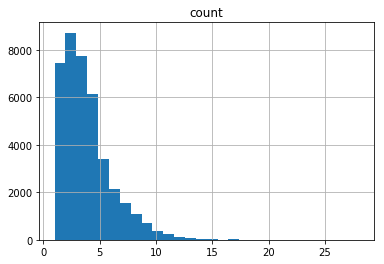

In [996]:
#Again, without a pregnancy_id, we are unable to reliably match pregnancy visits to a pregnancy or a delivery, 
#if the patient has more than one pregnancy
pregnancy_visit_counts = pregnancy_visit_df.groupby('pregnancy_visit_patient_id')['pregnancy_visit_form_id'].nunique().reset_index(name="count")

print('Maximum number of pregnancy visits for a single patient is ' + str(pregnancy_visit_counts['count'].max()))
print('The average number of pregnancy visits for a single patient is ' + str(pregnancy_visit_counts['count'].mean()))
print('The median number of pregnancy visits for a single patient is ' + str(pregnancy_visit_counts['count'].median()))
hist = pregnancy_visit_counts.hist(bins=28)
hist



In [999]:
#Deliveries

delivery_df['delivery_patient_id'].nunique()
delivery_df['delivery_id'].nunique()

32465

In [1003]:
facility_deliveries = delivery_df[delivery_df['facility_delivery']==True]
facility_deliveries['delivery_patient_id'].nunique()


28200

In [1006]:
delivery_danger = delivery_df[delivery_df['danger_signs_at_delivery']==True]
delivery_danger['delivery_patient_id'].nunique()


579

In [1009]:
postnatal = delivery_df[delivery_df['delivery_first_visit_on_time']==True]
postnatal['delivery_patient_id'].nunique()


30635

In [1012]:
risky_late = set(delivery_danger['delivery_patient_id']) - set(postnatal['delivery_patient_id'])
len(risky_late)


37

# Aggregating Data

1 max deliveries per patient
10 max pregnancy registrations per pateient


AttributeError: 'numpy.int64' object has no attribute 'count'

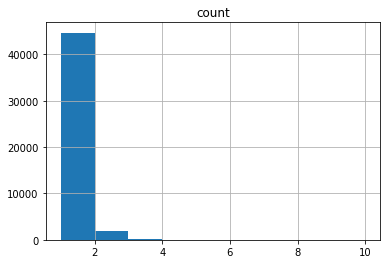

In [962]:
pregnancy

In [960]:
pregnancy_counts.head()

,pregnancy_patient_id,count
0,0000c86de88724accadc38f7dcfb807b,1
1,00015953a5b912803c46c51b13e69665,1
2,0001f330b60953f83b3e7d79c4d45a42,1
3,0002ad25a615c21162597bc41e8452e7,1
4,00038238757b71fb4ace66053bea76fe,1


In [912]:
#Next we want to know how many patients with a pregnancy registration do not have a delivery outcome?
print('There are ' + str(len(set(set(pregnancy_df['pregnancy_patient_id']) - set(delivery_df['delivery_patient_id'])))) + ' patients with a pregnancy registration who do not have a delivery outcome.')

#Do not have a pregnancy registration?
print('There are ' + str(len(set(set(delivery_df['delivery_patient_id']) - set(pregnancy_df['pregnancy_patient_id'])))) + ' patients with a delivery outcome who do not have a pregnancy registration.')


There are 17014 patients with a pregnancy registration who do not have a delivery outcome.
There are 2639 patients with a delivery outcome who do not have a pregnancy registration.


In [913]:
#Join pregnancy and delivery data
pregnancy_delivery_df = pd.merge(pregnancy_df, delivery_df, how='inner', left_on=['pregnancy_patient_id','pregnancy_hh_id'], right_on = ['delivery_patient_id','delivery_hh_id'])


In [965]:
pregnancy_df['pregnancy_patient_id'].nunique()

46840

In [966]:
delivery_df['delivery_patient_id'].nunique()

32465

In [967]:
pregnancy_delivery_df['pregnancy_patient_id'].nunique()

29826

In [968]:
pregnancy_delivery_df['delivery_patient_id'].nunique()

29826

In [970]:
pregnancy_delivery_df.count()

pregnancy_form_id                       31717
pregnancy_chw_id                        31717
pregnancy_date_time_submitted           31717
pregnancy_patient_id                    31717
pregnancy_hh_id                         31717
pregnancy_patient_age_in_years          31717
pregnancy_last_menstrual_period_date    31717
pregnancy_expected_due_date             31717
risk_factor_1                           31717
risk_factor_2                           31717
risk_factor_3                           31717
risk_factor_4                           31717
risk_factor_5                           31717
risk_factor_6                           31717
danger_signs_1                          31717
danger_signs_2                          31717
danger_signs_3                          31717
danger_signs_4                          31717
danger_signs_5                          31717
danger_signs_6                          31717
danger_signs_7                          31717
danger_signs_8                    

In [914]:
%%capture
#drop redundant joining columns
pregnancy_delivery_df.drop(columns=['delivery_patient_id', 'delivery_hh_id'])


In [915]:
#preview joined data
pregnancy_delivery_df.head()


,pregnancy_form_id,pregnancy_chw_id,pregnancy_date_time_submitted,pregnancy_patient_id,pregnancy_hh_id,pregnancy_patient_age_in_years,pregnancy_last_menstrual_period_date,pregnancy_expected_due_date,risk_factor_1,risk_factor_2,...,danger_signs_8,danger_signs_9,delivery_id,delivery_chw_id,delivery_date_time_submitted,delivery_patient_id,delivery_hh_id,facility_delivery,danger_signs_at_delivery,delivery_first_visit_on_time
0,fb4419f66aec81237d8f87c4ff0054a3,7f2d25199eef813addb4d9f783b3e075,2018-02-06,97a5f299f3254a998a3bca0ad11a154d,11d7a4f38fafa7954ce0752a1343e168,16.0,2017-08-07,2018-05-13,False,False,...,False,False,f5562a92c91af04ba249ea11cca6f735,7f2d25199eef813addb4d9f783b3e075,2018-03-03 08:06:41+00:00,97a5f299f3254a998a3bca0ad11a154d,11d7a4f38fafa7954ce0752a1343e168,True,False,True
1,60cee26693654bcdee37558c3efe79f8,82b888a09920a91a193b60fa68605243,2018-02-07,9769f2af62e82eb5bc661520a03739e5,2d3975a66c2fd5ec4653d151c025ba17,27.0,2017-07-29,2018-05-04,False,False,...,False,False,8d3616481a1ef21f4f6ab6a20c602a5d,82b888a09920a91a193b60fa68605243,2018-04-27 03:43:39+00:00,9769f2af62e82eb5bc661520a03739e5,2d3975a66c2fd5ec4653d151c025ba17,True,False,True
2,49776d9ba5b39fd209880c29cf30f10b,44d0a969dea0b117cf8eee9c671da1e1,2018-02-07,669a826b66e0615d3d5be61ea3c789f1,8085e6eee84c56353fcb12a324e4f0ec,32.0,2017-12-21,2018-09-26,False,False,...,False,False,8eefd62ebf2dd82361cfd7bb6c37ccd1,44d0a969dea0b117cf8eee9c671da1e1,2018-08-29 06:51:17+00:00,669a826b66e0615d3d5be61ea3c789f1,8085e6eee84c56353fcb12a324e4f0ec,False,NaN,True
3,73fbadf1c54c15e4d733e80899bd5a60,0296ee306ec54e31cdd661859e4a32ef,2018-02-07,34b484a85a48ed5441c5b09de6867306,0f01fd8cf6d363411725243842b8315d,28.0,2017-08-08,2018-05-14,False,False,...,False,False,6c2d0a4fc1224364215906d3a815cb43,0296ee306ec54e31cdd661859e4a32ef,2018-07-18 14:57:11+00:00,34b484a85a48ed5441c5b09de6867306,0f01fd8cf6d363411725243842b8315d,True,False,True
4,46f237f3890d2e9e37cb6b0e7fb0edc3,a3abfd66e17a0e3a1303dcb3bfb937d1,2018-02-07,c697f1476734d3b8782c6288a2aaf478,d4d73db5620f13202fdb7edd0c5c21c9,25.0,2017-12-08,2018-09-13,False,False,...,False,False,09006aac17fd54a94965895938dc5d19,a3abfd66e17a0e3a1303dcb3bfb937d1,2018-08-17 13:49:58+00:00,c697f1476734d3b8782c6288a2aaf478,d4d73db5620f13202fdb7edd0c5c21c9,True,False,True


In [ ]:
#ADD PREGNANCY VISITS DATASET

In [928]:
pregnancy_visit_df['danger_signs_1'].count()

138638

In [938]:
pregnancy_visit_df[pregnancy_visit_df['danger_signs_1']==True].count()
#1.3% of visits have danger signs_1

pregnancy_visit_df[pregnancy_visit_df['danger_signs_2']==True].count()
#0.3% of visits have danger_signs_2

pregnancy_visit_df[(pregnancy_visit_df['danger_signs_1']==True) | (pregnancy_visit_df['danger_signs_2']==True) | (pregnancy_visit_df['danger_signs_3']==True) | (pregnancy_visit_df['danger_signs_4']==True) | (pregnancy_visit_df['danger_signs_5']==True) | (pregnancy_visit_df['danger_signs_6']==True) | (pregnancy_visit_df['danger_signs_7']==True) | (pregnancy_visit_df['danger_signs_8']==True) | (pregnancy_visit_df['danger_signs_9']==True)].count()

##Only 3.3% of pregnancy visits have danger signs



pregnancy_visit_form_id                        4536
pregnancy_visit_chw_id                         4536
pregnancy_visit_date_time_submitted            4536
pregnancy_visit_patient_id                     4536
pregnancy_visit_hh_id                          4536
pregnancy_visit_how_visit_conducted            4536
pregnancy_visit_referred_to_health_facility    4536
danger_signs_1                                 4536
danger_signs_2                                 4536
danger_signs_3                                 4536
danger_signs_4                                 4536
danger_signs_5                                 4536
danger_signs_6                                 4536
danger_signs_7                                 4536
danger_signs_8                                 4536
danger_signs_9                                 4536
dtype: int64

In [940]:
pregnancy_visit_df.head()

,pregnancy_visit_form_id,pregnancy_visit_chw_id,pregnancy_visit_date_time_submitted,pregnancy_visit_patient_id,pregnancy_visit_hh_id,pregnancy_visit_how_visit_conducted,pregnancy_visit_referred_to_health_facility,danger_signs_1,danger_signs_2,danger_signs_3,danger_signs_4,danger_signs_5,danger_signs_6,danger_signs_7,danger_signs_8,danger_signs_9
0,b7f54f0722371170bc030cba2d48a625,17a3051e53283b760752528ca672475f,2018-01-14,43247b91bca109e83ff8e119daaab050,49a14e0b378aeaeedc49ae48b3188878,in_person,False,False,False,False,False,False,False,False,False,False
1,8addb85dd2089ae4909196de9568cbb5,17a3051e53283b760752528ca672475f,2017-11-22,43247b91bca109e83ff8e119daaab050,49a14e0b378aeaeedc49ae48b3188878,in_person,False,False,False,False,False,False,False,False,False,False
2,f37c94789946fe18b90153091617f18e,17a3051e53283b760752528ca672475f,2018-01-03,43247b91bca109e83ff8e119daaab050,49a14e0b378aeaeedc49ae48b3188878,in_person,False,False,False,False,False,False,False,False,False,False
3,014c6d3d0e47b2393b6037967f7a773e,17a3051e53283b760752528ca672475f,2017-10-15,43247b91bca109e83ff8e119daaab050,49a14e0b378aeaeedc49ae48b3188878,in_person,True,False,False,False,False,True,True,False,False,False
4,c02d4aa61a5cc2a7ad5108ea3255c9f3,17a3051e53283b760752528ca672475f,2017-12-12,43247b91bca109e83ff8e119daaab050,49a14e0b378aeaeedc49ae48b3188878,in_person,False,False,False,False,False,False,False,False,False,False


Maximum number of pregnancy visits for a single patient is 28


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2a0c43cc0>]],
      dtype=object)

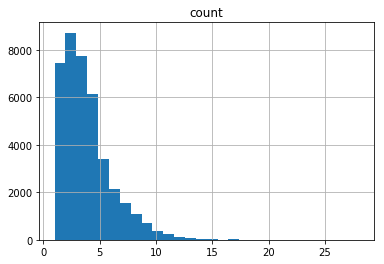

In [978]:

more_visits = pd.DataFrame(pregnancy_visit_counts[pregnancy_visit_counts['count'] >= 3])

more_visits['pregnancy_visit_patient_id'].nunique()

23642

In [979]:
pregnancy_visit_counts['pregnancy_visit_patient_id'].nunique()

#Of the patients who had at least one pregnancy visit, 99.3% of them had 3 or more pregnancy visits

39803

In [964]:
pregnancy_delivery_df.count()

pregnancy_form_id                       31717
pregnancy_chw_id                        31717
pregnancy_date_time_submitted           31717
pregnancy_patient_id                    31717
pregnancy_hh_id                         31717
pregnancy_patient_age_in_years          31717
pregnancy_last_menstrual_period_date    31717
pregnancy_expected_due_date             31717
risk_factor_1                           31717
risk_factor_2                           31717
risk_factor_3                           31717
risk_factor_4                           31717
risk_factor_5                           31717
risk_factor_6                           31717
danger_signs_1                          31717
danger_signs_2                          31717
danger_signs_3                          31717
danger_signs_4                          31717
danger_signs_5                          31717
danger_signs_6                          31717
danger_signs_7                          31717
danger_signs_8                    

In [ ]:
#create pregnancy only dataset

#inner join for only people with a registered pregnancy
person_family_pregnancy_df = pd.merge(person_family_df, pregnancy_df,  how='inner', left_on=['person_id','hh_id'], right_on = ['pregnancy_patient_id','pregnancy_hh_id'])
#person_family_pregnancy_df.drop(columns=['pregnancy_patient_id', 'pregnancy_hh_id'])

person_family_pregnancy_pregnancy_visit_df = pd.merge(person_family_pregnancy_df, pregnancy_visit_df,  how='left', left_on=['person_id','hh_id'], right_on = ['pregnancy_visit_patient_id','pregnancy_visit_hh_id'])
#person_family_pregnancy_pregnancy_visit_df.drop(columns=['pregnancy_visit_patient_id', 'pregnancy_visit_hh_id'])

pregnancy_only_df = pd.merge(person_family_pregnancy_pregnancy_visit_df, delivery_df,  how='left', left_on=['person_id','hh_id'], right_on = ['delivery_patient_id','delivery_hh_id'])
#pregnancy_only_df.drop(columns=['delivery_patient_id', 'delivery_hh_id'])


In [ ]:
#join person and family_survey
person_family_df = pd.merge(person_df, family_survey_df, how='left', left_on=['hh_id'], right_on = ['hh_id']) 

In [ ]:
person_family_df.columns

In [ ]:
#join assessment
person_family_assessments_df = pd.merge(person_family_df, assessments_df,  how='left', left_on=['person_id','hh_id'], right_on = ['assessment_patient_id','assessment_hh_id'], suffixes=('', '_y'))

In [ ]:
person_family_assessments_df.columns

In [ ]:
#drop redundant columns
person_family_assessments_df.drop(columns=['assessment_patient_id', 'assessment_hh_id'])

In [ ]:
#join assessment_follow_up
person_family_assessments_assessment_follow_up_df = pd.merge(person_family_assessments_df, assessment_follow_up_df,  how='left', left_on=['person_id','hh_id', 'assessment_assessment_id'], right_on = ['assessment_follow_up_patient_id','assessment_follow_up_hh_id', 'assessment_follow_up_assessment_id'], suffixes=('', '_y'))

In [ ]:
#drop redundant columns
person_family_assessments_assessment_follow_up_df.drop(columns=['assessment_follow_up_patient_id', 'assessment_follow_up_hh_id', 'assessment_follow_up_assessment_id'])

In [ ]:
#join pregnancy



person_family_assessments_assessment_follow_up_pregnancy_df = pd.merge(person_family_assessments_assessment_follow_up_df, pregnancy_df,  how='left', left_on=['person_id','hh_id'], right_on = ['pregnancy_patient_id','pregnancy_hh_id'])





In [ ]:
person_family_assessments_assessment_follow_up_pregnancy_df.drop(columns=['pregnancy_patient_id', 'pregnancy_hh_id'])

In [ ]:
person_family_assessments_assessment_follow_up_pregnancy_pregnancy_visit_df = pd.merge(person_family_assessments_assessment_follow_up_pregnancy_df, pregnancy_visit_df,  how='left', left_on=['person_id','hh_id'], right_on = ['pregnancy_visit_patient_id','pregnancy_visit_hh_id'])


In [ ]:
person_family_assessments_assessment_follow_up_pregnancy_pregnancy_visit_df.drop(columns=['pregnancy_visit_patient_id', 'pregnancy_visit_hh_id'])

In [ ]:
master_df = pd.merge(person_family_assessments_assessment_follow_up_pregnancy_pregnancy_visit_df, delivery_df,  how='left', left_on=['person_id','hh_id'], right_on = ['delivery_patient_id','delivery_hh_id'])






In [ ]:
master_df.drop(columns=['delivery_patient_id', 'delivery_hh_id'])

In [ ]:
master_df.head()

In [ ]:
#BEGIN DATA EXPLORATION
master_df.columns

In [ ]:
for i in master_df.columns:
    print(type(i))

# Pregnancy Data Investigation

In [ ]:
#create pregnancy only dataset

#inner join for only people with a registered pregnancy
person_family_pregnancy_df = pd.merge(person_family_df, pregnancy_df,  how='inner', left_on=['person_id','hh_id'], right_on = ['pregnancy_patient_id','pregnancy_hh_id'])
#person_family_pregnancy_df.drop(columns=['pregnancy_patient_id', 'pregnancy_hh_id'])

person_family_pregnancy_pregnancy_visit_df = pd.merge(person_family_pregnancy_df, pregnancy_visit_df,  how='left', left_on=['person_id','hh_id'], right_on = ['pregnancy_visit_patient_id','pregnancy_visit_hh_id'])
#person_family_pregnancy_pregnancy_visit_df.drop(columns=['pregnancy_visit_patient_id', 'pregnancy_visit_hh_id'])

pregnancy_only_df = pd.merge(person_family_pregnancy_pregnancy_visit_df, delivery_df,  how='left', left_on=['person_id','hh_id'], right_on = ['delivery_patient_id','delivery_hh_id'])
#pregnancy_only_df.drop(columns=['delivery_patient_id', 'delivery_hh_id'])



In [ ]:
pregnancy_only_df.columns

In [ ]:
pregnancy_only_df.head()

In [ ]:
len(pregnancy_only_df)

In [ ]:
#How many registered pregnancies
pregnancy_only_df['pregnancy_form_id'].nunique()

In [ ]:
#How many patients
#Count patient ids from original dataset since we left joined from the person table
pregnancy_df['pregnancy_patient_id'].nunique()

In [ ]:
pregnancy_only_df['pregnancy_patient_id'].nunique()

In [ ]:
pregnancy_only_df['person_id'].nunique()

In [ ]:
pregnancy_only_df['hh_id'].nunique()

In [ ]:
delivery_df['delivery_id'].nunique()

In [ ]:
pregnancy_only_df['delivery_id'].nunique()

In [ ]:
outer_pregnancy_delivery_df = pd.merge(pregnancy_df, delivery_df,  how='outer', left_on=['pregnancy_patient_id','pregnancy_hh_id'], right_on = ['delivery_patient_id','delivery_hh_id'])
#pe

In [ ]:
outer_pregnancy_delivery_df['pregnancy_patient_id'].nunique()

In [ ]:
outer_pregnancy_delivery_df['delivery_patient_id'].nunique()

In [ ]:
inner_pregnancy_delivery_df = pd.merge(pregnancy_df, delivery_df,  how='inner', left_on=['pregnancy_patient_id','pregnancy_hh_id'], right_on = ['delivery_patient_id','delivery_hh_id'])


In [ ]:
inner_pregnancy_delivery_df['pregnancy_patient_id'].nunique()

In [ ]:
inner_pregnancy_delivery_df['delivery_patient_id'].nunique()

In [ ]:
#how many people had registered pregnancies vs how many people had registered pregnancies and registered deliveries
#46840 - 29826 = 17014

# Pregnancies Per Woman

In [ ]:
pregnancy_only_df.groupby('person_id')['pregnancy_pregnancy_form_id'].nunique()


In [ ]:
pregnancy_df[pregnancy_df['pregnancy_patient_id'] == 'fff434779d039bf8b331f4c06beaf27b']

In [ ]:
delivery_df[delivery_df['delivery_patient_id'] == 'fff434779d039bf8b331f4c06beaf27b']

In [ ]:
pregnancy_only_df.head()

# Converting Data Types

In [ ]:
#convert date strings to date objects
pregnancy_only_df['date_of_birth'] = pd.to_datetime(pregnancy_only_df['date_of_birth'])
pregnancy_only_df['pregnancy_last_menstrual_period_date'] = pd.to_datetime(pregnancy_only_df['pregnancy_last_menstrual_period_date'])
pregnancy_only_df['pregnancy_date_time_submitted'] = pd.to_datetime(pregnancy_only_df['pregnancy_date_time_submitted'])
pregnancy_only_df['pregnancy_expected_due_date'] = pd.to_datetime(pregnancy_only_df['pregnancy_expected_due_date'])          
pregnancy_only_df['pregnancy_visit_date_time_submitted'] = pd.to_datetime(pregnancy_only_df['pregnancy_visit_date_time_submitted'])                                                                  
pregnancy_only_df['delivery_delivery_date_time_submitted'] = pd.to_datetime(pregnancy_only_df['delivery_delivery_date_time_submitted'])                                                                                                                          
                                                                          
                                                             
                                                                          

In [ ]:
#add age_at_last_menstrual_period_date
#def calculate_age_at_date(birth_date, menstrual_date):
##    menstrual_date = pregnancy_only_df['pregnancy_last_menstrual_period_date']
#    birth_date = pregnancy_only_df['date_of_birth']
#    return menstrual_date.year - birth_date.year - ((menstrual_date.month, menstrual_date.day) < (birth_date.month, birth_date.day))

#pregnancy_only_df['age'] = pregnancy_only_df[['date_of_birth', 'pregnancy_last_menstrual_period_date']].apply(calculate_age_at_date)

In [ ]:
#data quality check
pregnancy_only_df.groupby('sex').nunique()
#pregnancy_only_df.groupby('person_id')['pregnancy_pregnancy_form_id'].nunique()

In [ ]:
pregnancy_only_df.head()

In [ ]:
#convert date strings to date objects
pregnancy_df['pregnancy_last_menstrual_period_date'] = pd.to_datetime(pregnancy_df['pregnancy_last_menstrual_period_date'])
pregnancy_df['pregnancy_date_time_submitted'] = pd.to_datetime(pregnancy_df['pregnancy_date_time_submitted'])
pregnancy_df['pregnancy_expected_due_date'] = pd.to_datetime(pregnancy_df['pregnancy_expected_due_date'])          
                                                                          
     

In [ ]:

#pregnancy_df['pregnancy_date_time_submitted'] = [d.date() for d in pregnancy_df['pregnancy_date_time_submitted']]

#pregnancy_df['pregnancy_date_time_submitted'] = pd.to_datetime(pregnancy_df['pregnancy_date_time_submitted'])

In [ ]:
pregnancy_df['pregnancy_date_time_submitted']

In [ ]:
#pregnancy_df['days_pregnant'] = 
#pd.to_datetime(pregnancy_df['pregnancy_date_time_submitted']) - pd.to_datetime(pregnancy_df['pregnancy_last_menstrual_period_date'])
pregnancy_df['days_pregnant'] = pd.to_datetime(pregnancy_df['pregnancy_expected_due_date']) - pd.to_datetime(pregnancy_df['pregnancy_last_menstrual_period_date'])

#print(pregnancy_df['pregnancy_date_time_submitted'])
#print(pregnancy_df['pregnancy_last_menstrual_period_date'])


# Pregnancy Registration to Delivery

In [ ]:
pregnancy_delivery_df = pd.merge(delivery_df, pregnancy_df,  how='inner', left_on=['delivery_patient_id','delivery_hh_id'], right_on = ['pregnancy_patient_id','pregnancy_hh_id'])


In [ ]:
pregnancy_delivery_df['delivery_patient_id'].nunique()

In [ ]:
pregnancy_delivery_df['pregnancy_chw_id'].nunique()

In [ ]:
pregnancy_delivery_df.drop(columns=['delivery_patient_id', 'delivery_hh_id'])

In [ ]:
pregnancy_delivery_df['delivery_facility_delivery'].describe()

In [ ]:
pregnancy_delivery_df.isnull().any()

In [ ]:
len(pregnancy_delivery_df)

In [ ]:
pregnancy_delivery_df['delivery_facility_delivery']

In [ ]:
#Response Variable is pregnancy_delivery_df['delivery_facility_delivery']


In [ ]:
pregnancy_delivery_df.columns

In [ ]:
pregnancy_delivery_household_count = pd.merge(pregnancy_delivery_df, household_count, how='left', left_on=['delivery_hh_id'], right_on = ['hh_id'])




 
pregnancy_delivery_household_count['household_count'] = pregnancy_delivery_household_count['person_id']
pregnancy_delivery_household_count.drop(columns =["person_id"], inplace = True) 

pregnancy_delivery_df = pregnancy_delivery_household_count


In [ ]:
oops!

In [ ]:
pregnancy_delivery_df_subset = pregnancy_delivery_df[['risk_factor_1', 'risk_factor_2', 'risk_factor_3', 'risk_factor_4',
       'risk_factor_5', 'risk_factor_6', 'danger_signs_1', 'danger_signs_2',
       'danger_signs_3', 'danger_signs_4', 'danger_signs_5', 'danger_signs_6',
       'danger_signs_7', 'danger_signs_8', 'danger_signs_9', 'household_count','delivery_facility_delivery']]

In [ ]:
#Split the data into training and test sets

#Separate the target variable from the rest of the data
def split_target(data, target_name):
    target = data[[target_name]]
    data.drop(target_name, axis=1, inplace=True)
    return (data, target)

X, y = split_target(pregnancy_delivery_df_subset, 'delivery_facility_delivery') #y holds response variable, X holds our dataset

#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1234 #for reproducibility
)

In [ ]:
#Check the number of positive and negative responses in the response variable 
#- do we need to do any upsampling or downsampling of the data?
print(y_train.groupby('delivery_facility_delivery').size())

In [ ]:
X_train

In [ ]:
#NumPy array conversion for scikitlearn

#First, we save the final column names, which will assist us when we assess variable importance later on:

X_train_cols = X_train.columns
X_test_cols = X_test.columns

#Now, we use the values attribute of the pandas DataFrames to access the underlying NumPy array for each DataFrame:
X_train = X_train.values
X_test = X_test.values

In [ ]:
#Now, we use the values attribute of the pandas DataFrames to access the underlying NumPy array for each DataFrame:
y_train = y_train.values
y_test = y_test.values

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clfs = [LogisticRegression()]

for clf in clfs:
    clf.fit(X_train, y_train.ravel())
    print(type(clf))
    print('Training accuracy: ' + str(clf.score(X_train, y_train)))
 #   print('Validation accuracy: ' + str(clf.score(X_test, y_test)))
    
    coefs = {
        'column': [X_train_cols[i] for i in range(len(X_train_cols))],
        'coef': [clf.coef_[0,i] for i in range(len(X_train_cols))]
    }
    df_coefs = pd.DataFrame(coefs)
    print(df_coefs.sort_values('coef', axis=0, ascending=False))
    
    #In general, features with coefficients that are farther from zero are the most positively/negatively correlated
    #with the outcome. However, we did not scale the data prior to training, so it is possible that more 
    #important predictors that are not scaled appropriately will have lower coefficients.

In [ ]:
df_coefs

In [ ]:
pregnancy_delivery_df_subset.describe()

In [ ]:
#feature selection
#number of people in the household
pregnancy_delivery_df.head()

In [ ]:
person_df.head()
#join person and family_survey
#person_family_df = pd.merge(person_df, family_survey_df, how='left', left_on=['hh_id'], right_on = ['hh_id']) 

In [ ]:
household_count = pd.DataFrame(person_df.groupby('hh_id')['person_id'].nunique())


In [ ]:

pregnancy_delivery_household_count